# Regime transition models
We investigate Markov-chains models with three different transition matrices to study the occurance of the apparent three fix points in the transition model estimated from the empirical data.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import copy
#from scipy.optimize import minimize

from scipy.optimize import lsq_linear


sns.set_context("talk", font_scale=1.4)

In [5]:
# # load the transition matrix
# P_allCountries_Bayes = np.genfromtxt('./../results/transitionBayesAllCountries.csv')

In [12]:
# function to compute the expected change
def computeExpectedChanges(transitionMatrix):
    deltaS=np.zeros((21,21))
    for K in np.arange(-20,21,1):
        deltaS = deltaS + K*np.eye(N=21,M=21,k=K)

        
    weightedDeltaS = np.multiply(transitionMatrix,deltaS)
    meanDeltaS = np.sum(weightedDeltaS,axis=1)

    return(meanDeltaS)

## 1) Uniform transition model
To study whether the sinus-shaped functional form of the expected change $\Delta s(i)$ is exclusively driven by boundary effects, we compute the uniform transition model 

$p_{ij} =1/N$ for all $i$,$j$

In [13]:
def uniformTranstionModel(numberStates=21):
    # all transitions have the same probability
    P=np.ones(shape=(numberStates,numberStates))
    # normalise
    P = P/np.sum(P,axis=0)
    return(P)

In [15]:
# compute the model
uniformTransition21=uniformTranstionModel()
# and the expected change
meanDeltaS_uniform = computeExpectedChanges(uniformTransition21)

## 2) Distance dropoff model

In [473]:
# def distanceDropoffModel(numberStates=21, alpha=0.2):
#     P=alpha*np.ones(shape=(numberStates,numberStates))
#     L=(numberStates-1)/2 # number of states in each direction such that [-L,-L+1,...,0,....L-1,L]

#     #prefactor = 3/((np.pi)**2)
#     prefactor = 1/(np.pi)

#     for d1 in np.arange(21):
#         for d2 in np.arange(21):
#             location1 = (d1 - L)
#             location2 = (d2 - L)
#             distance = abs(location1-location2)
#             print('distance',distance)
#             #print(distance)


#             if distance == 0:
#                 P[d1,d2] = 0
#             else: 
#                 #P[d1,d2] = alpha*np.exp(-(1+distance))
#                 P[d1,d2] = prefactor*(distance)**(-2)
#                 print(P[d1,d2])
#      # now we set the remain probability to be the left-over probability such that it is normalised
#     for d1 in np.arange(numberStates):
#         transitionProbability= np.sum(P[d1,:])
#         #print(transitionProbability)
#         P[d1,d1] = 1 - transitionProbability
#     # # normalise
#     # P = P/np.sum(P,axis=0)
#     return(P)

def distanceDropoffModel(numberStates=21, alpha=0.2):
    P=alpha*np.ones(shape=(numberStates,numberStates))
    L=(numberStates-1)/2 # number of states in each direction such that [-L,-L+1,...,0,....L-1,L]

    prefactor = 3/((np.pi)**2)
    #prefactor = 1/(np.pi)

    for d1 in np.arange(21):
        for d2 in np.arange(21):
            location1 = (d1 - L)
            location2 = (d2 - L)
            distance = abs(location1-location2)
            #print('distance',distance)
            #print(distance)


            if distance == 0:
                P[d1,d2] = 0
            else: 
                P[d1,d2] = (1/L)*(distance**(-1))
                #P[d1,d2] = alpha*np.exp(-(1+distance))
                #P[d1,d2] = np.exp(-alpha*distance)
                #print(P[d1,d2])
     # now we set the remain probability to be the left-over probability such that it is normalised
    for d1 in np.arange(numberStates):
        transitionProbability= np.sum(P[d1,:])
        print(transitionProbability)
        P[d1,d1] = 1 - transitionProbability
    # normalise
    #P = np.transpose(P/np.sum(P,axis=1))
    return(P)

In [474]:
# compute the model
distanceTransition21=distanceDropoffModel(alpha=1)
# and the expected change
meanDeltaS_distance = computeExpectedChanges(distanceTransition21)

0.35977396571436815
0.4547739657143682
0.49951080781963125
0.5272885855974091
0.5464062326562327
0.5601562326562326
0.5701562326562326
0.5772990897990897
0.582106782106782
0.5848845598845598
0.5857936507936508
0.5848845598845599
0.5821067821067821
0.5772990897990898
0.5701562326562328
0.5601562326562327
0.5464062326562328
0.5272885855974092
0.49951080781963136
0.4547739657143681
0.35977396571436815


In [475]:
np.sum(distanceTransition21,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

<AxesSubplot:>

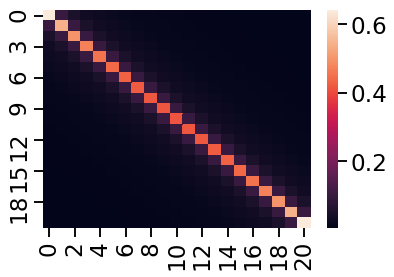

In [476]:
sns.heatmap(distanceTransition21)

## 3) Extremist model

In [477]:
def extremistTransitionModel(numberStates=21,alpha=0.5):
    P=np.ones(shape=(numberStates,numberStates))
    L=(numberStates-1)/2 # number of states in each direction such that [-L,-L+1,...,0,....L-1,L]
    for d1 in np.arange(numberStates):
        for d2 in np.arange(numberStates):
            location1 = (d1 - L)/L
            location2 = (d2 - L)/L

            distance = abs(location1-location2)

            remainProb = abs(location1)**alpha
            moveProb = (1-remainProb)/(2*L)
            if distance == 0:
                P[d1,d2] = remainProb
            else: 
                P[d1,d2] = moveProb
   

    # # normalise
    # P = P/np.sum(P,axis=0)
    return(P)


In [478]:
# compute the model
extremistTransition21=extremistTransitionModel(alpha=2)
# and the expected change
meanDeltaS_extremist = computeExpectedChanges(extremistTransition21)

<AxesSubplot:>

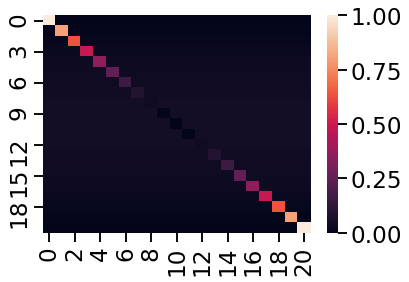

In [479]:
sns.heatmap(extremistTransition21)

In [480]:
np.sum(extremistTransition21,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

## Plotting

Text(0.5, 1.0, 'extremist model')

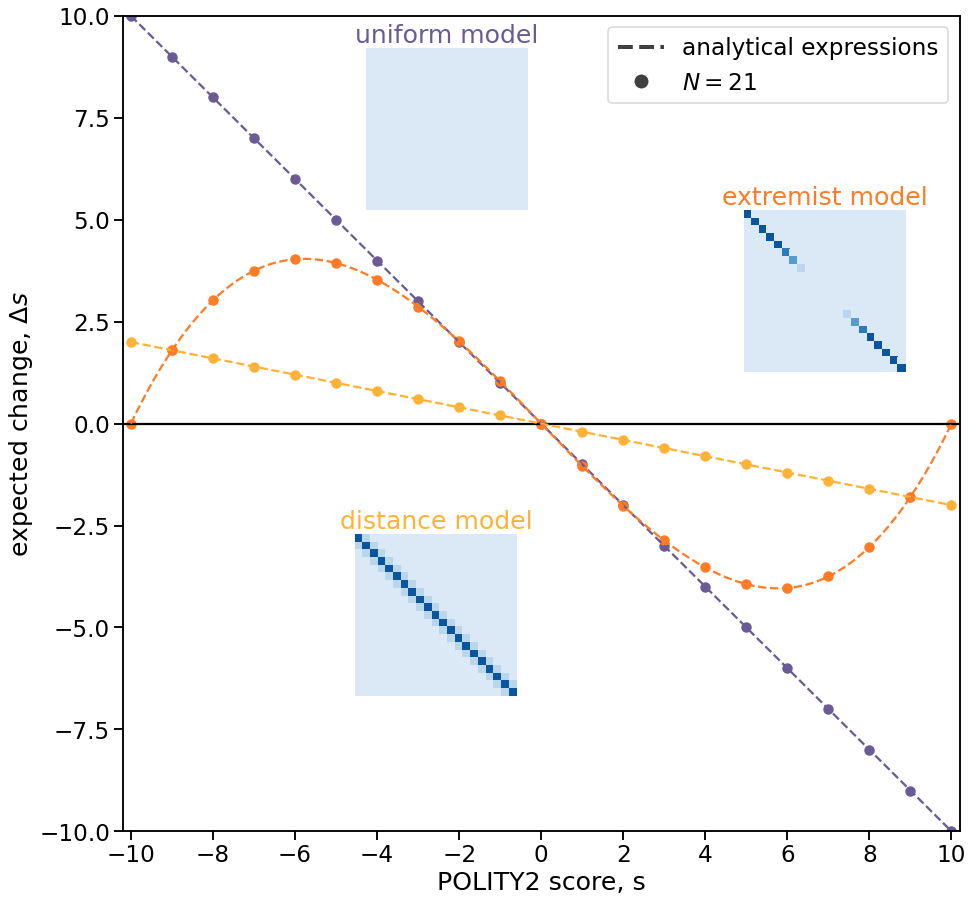

In [556]:
x=np.arange(-10,11,1)


color1='#6b5b95'
color2='#feb236'
color3='#ff7b25'


markerSize = 80

# plotting data
fig, ax1 = plt.subplots(figsize=(15,15))
plt.scatter(np.arange(-10,11,1),meanDeltaS_uniform,markerSize,color=color1,marker='o', facecolors=color1,label='uniform model')
plt.scatter(np.arange(-10,11,1),meanDeltaS_distance,markerSize,color=color2,marker='o', facecolors=color2,label='distance model')
plt.scatter(np.arange(-10,11,1),meanDeltaS_extremist,markerSize,color=color3,marker='o', facecolors=color3,label='extremist model')

# plottign theoretical lines

L=10
xTheory =np.arange(-L,L,0.01)
N=len(x)
L=(N-1)/2

theoryUniform = -1*xTheory
plt.plot(xTheory,theoryUniform,color1,linestyle='--')


theoryDistance = -2*xTheory*(1/L)
plt.plot(xTheory,theoryDistance,color2,linestyle='--')

alphaI = (xTheory/L)**2
theoryExtremist = -(N/(2*L))*(1-alphaI)*xTheory
plt.plot(xTheory,theoryExtremist,color3,linestyle='--')


plt.ylabel(r'expected change, $\Delta s$')
plt.hlines(y=0,xmin=-11,xmax=11,linestyles='solid',color='k')
plt.xlabel('POLITY2 score, s')
plt.xlim([-10.2,10.2])
plt.xticks(np.arange(-10,11,2))
#plt.legend()
ax1.set_ylim(-10,10)

## custom legend
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
custom_lines = [Line2D([0], [0], color='#404040', lw=4,linestyle='--'),
                Line2D([0], [0], markerfacecolor='#404040', lw=4,linestyle='--', marker='o', color='w', markersize=15)]

ax1.legend(custom_lines, [r'analytical expressions', r'$N=21$'])

# plot heatmaps of transition probabilities

vmaxAll = 0.32
subax1 = fig.add_axes([0.35,0.7,0.15,0.15])
sns.heatmap(uniformTransition21,ax=subax1, cbar=False,cmap=sns.color_palette("Blues"), vmin=0, vmax=vmaxAll)
subax1.axis('off')
subax1.set_title(r'uniform model',color=color1)

subax2 = fig.add_axes([0.34,0.25,0.15,0.15])
sns.heatmap(distanceTransition21,ax=subax2, cbar=False,cmap=sns.color_palette("Blues"), vmin=0, vmax=vmaxAll)
subax2.axis('off')
subax2.set_title(r'distance model',color=color2)

subax3 = fig.add_axes([0.7,0.55,0.15,0.15])
sns.heatmap(extremistTransition21,ax=subax3, cbar=False,cmap=sns.color_palette("Blues"), vmin=0, vmax=vmaxAll)
subax3.axis('off')
subax3.set_title(r'extremist model',color=color3)


plt.savefig('./../results/figures/Fig8-expectedDeltasWithAbs.pdf')
#plt.title(r'constant transition model')




<AxesSubplot:>

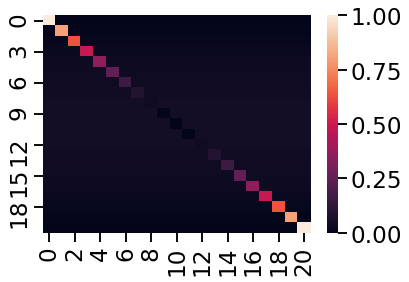

In [493]:
sns.heatmap(extremistTransition21)

In [212]:
meanDeltaS_distance

array([ 3.03290982e+01,  2.85233266e+01,  2.62836940e+01,  2.36847767e+01,
        2.07913266e+01,  1.76598278e+01,  1.43399167e+01,  1.08756894e+01,
        7.30691691e+00,  3.67018817e+00,  1.77635684e-15, -3.67018817e+00,
       -7.30691691e+00, -1.08756894e+01, -1.43399167e+01, -1.76598278e+01,
       -2.07913266e+01, -2.36847767e+01, -2.62836940e+01, -2.85233266e+01,
       -3.03290982e+01])

In [322]:
theoryExtremist

array([-0.    , -1.7955, -3.024 , -3.7485, -4.032 , -3.9375, -3.528 ,
       -2.8665, -2.016 , -1.0395,  0.    ,  1.0395,  2.016 ,  2.8665,
        3.528 ,  3.9375,  4.032 ,  3.7485,  3.024 ,  1.7955,  0.    ])

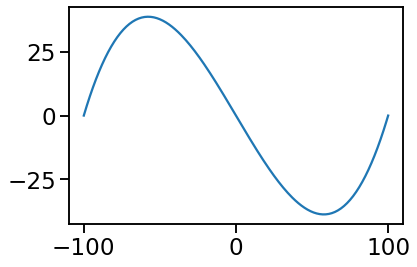

In [329]:
plt.plot(xTheory,theoryExtremist)